# problem statement

A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as follows:
1.)Check eligibility of the Customer given the inputs described above.(Classification)

# 1.)Check eligibility of the Customer given the inputs described above.(Classification) 

# Read data set

import necessary libraries

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

# profile of data

In [2]:
trd=pd.read_csv("downloads/train data for loan.csv")

In [3]:
trd.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
tsd=pd.read_csv("downloads/test data for loan.csv")

In [5]:
tsd.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# treating missing data

In [6]:
trd.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
tsd.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [8]:
for i in tsd.columns:
    if(trd[i].dtypes == "object"):
        x = trd[i].mode()[0]
        trd[i] = trd[i].fillna(x)
        tsd[i] = tsd[i].fillna(x)
    else:
        x = trd[i].mean()
        trd[i] = trd[i].fillna(x)
        tsd[i] = tsd[i].fillna(x)

# outliers 

outliers check always on continues columns

In [9]:
con=[]
cat=[]
for i in trd.columns:
    if(trd[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [10]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [11]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Q = pd.DataFrame(ss.fit_transform(trd[con]),columns=con)

In [13]:
outliers = []
for i in Q.columns:
    outliers.extend(list(Q[(Q[i]<-3)|(Q[i]>3)].index))
    
from numpy import unique
outliers = unique(outliers)

In [14]:
trd = trd.drop(index = outliers,axis=0)

In [15]:
trd.shape

(577, 13)

In [16]:
trd.index = range(0,trd.shape[0])

# EDA (Exploratory data analysis)

In [17]:
trd[con].skew()

ApplicantIncome      2.145688
CoapplicantIncome    1.351359
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
dtype: float64

here is minimum skewness so we can neglect it

In [18]:
def ANOVA(df,cat,con):
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import anova_lm
    rel=con+"~"+cat
    model=ols(rel,df).fit()
    W=anova_lm(model)
    pval=round(W.iloc[0:1,4][0],4)
    return pval

In [19]:
for i in con:
    p=ANOVA(trd,"Loan_Status",i)
    print("Loan_status vs",i,"pval-->",p)

Loan_status vs ApplicantIncome pval--> 0.8943
Loan_status vs CoapplicantIncome pval--> 0.2821
Loan_status vs LoanAmount pval--> 0.3975
Loan_status vs Loan_Amount_Term pval--> 0.6636
Loan_status vs Credit_History pval--> 0.0


# Preprocessing

In [20]:
Y_trd=trd[["Loan_Status"]]
X_trd=trd.drop(labels=["Loan_ID","Loan_Status"],axis=1)

In [21]:
from PM12 import catcon
cat,con=catcon(X_trd)

In [22]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [23]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

MinMaxScaler scales the data to a fixed range, typically between 0 and 1. 

In [24]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x1_trd = pd.DataFrame(mm.fit_transform(X_trd[con]),columns=con)
x2_trd = pd.get_dummies(X_trd[cat])
Xnew_trd = x1_trd.join(x2_trd)

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew_trd,Y_trd,test_size=0.2,random_state=21)

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_accuracy=accuracy_score(ytrain,tr_pred)
ts_accuracy=accuracy_score(ytest,ts_pred)


In [27]:
tr_accuracy

0.8156182212581344

In [28]:
ts_accuracy

0.8448275862068966

# Decision tree

In [29]:
def modeller(mo):
    model=mo.fit(xtrain,ytrain)
    tr_pred=model.predict(xtrain)
    ts_pred=model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_accuracy=round(accuracy_score(ytrain,tr_pred),2)
    ts_accuracy=round(accuracy_score(ytest,ts_pred),2)
    return tr_accuracy,ts_accuracy

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
modeller(dtc)

(1.0, 0.72)

In [31]:
for i in range(2,20):
    dtc=DecisionTreeClassifier(random_state=21,max_depth=i)
    print(i,modeller(dtc))

2 (0.81, 0.84)
3 (0.83, 0.83)
4 (0.84, 0.81)
5 (0.85, 0.8)
6 (0.87, 0.8)
7 (0.9, 0.77)
8 (0.92, 0.73)
9 (0.95, 0.71)
10 (0.97, 0.69)
11 (0.98, 0.7)
12 (0.99, 0.7)
13 (1.0, 0.7)
14 (1.0, 0.68)
15 (1.0, 0.68)
16 (1.0, 0.68)
17 (1.0, 0.68)
18 (1.0, 0.68)
19 (1.0, 0.68)


at index no.3 we got best result less overfit model

# KNN classifier

KNN stands for kneighbors classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
modeller(knc)

(0.81, 0.75)

In [33]:
for i in range(2,20):
    knc = KNeighborsClassifier(n_neighbors=i)
    print(i,modeller(knc))

2 (0.9, 0.69)
3 (0.85, 0.75)
4 (0.86, 0.72)
5 (0.81, 0.75)
6 (0.8, 0.72)
7 (0.77, 0.7)
8 (0.79, 0.71)
9 (0.76, 0.73)
10 (0.76, 0.72)
11 (0.75, 0.74)
12 (0.76, 0.74)
13 (0.74, 0.75)
14 (0.74, 0.76)
15 (0.74, 0.77)
16 (0.74, 0.76)
17 (0.72, 0.77)
18 (0.73, 0.76)
19 (0.72, 0.77)


# best model

train the model with entire data in training set

In [34]:
dtc=DecisionTreeClassifier(random_state=21,max_depth=3)
finmodel=dtc.fit(Xnew_trd,Y_trd)

# data prepartion for testing set

In [35]:
xtrain.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [36]:
X_tsd=tsd.drop(labels=["Loan_ID"],axis=1)

In [37]:
from PM12 import catcon
cat,con=catcon(X_tsd)

In [38]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [39]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [40]:
X1_tsd=pd.DataFrame(mm.transform(X_tsd[con]),columns=con)
X2_tsd=pd.get_dummies(X_tsd[cat])

In [41]:
Xnew_tsd=X1_tsd.join(X2_tsd)

In [42]:
#Xnew_tsd[Xnew_trd.columns]

above is the commant to check the columns which is present in Xnew_trd and Xnew_tsd

In [43]:
pred_LS=finmodel.predict(Xnew_tsd)

# final Dataframe

In [44]:
F=tsd[["Loan_ID"]]
F["Loan_Status"]=pred_LS

In [45]:
F.to_csv("desktop/Loan_status_ans_by_sir.csv")

In [46]:
F

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


# If customer is not eligible for the input required amount and duration: 2. what can be amount for the given duration.(Regression) 

In [47]:
F["Amount"]=tsd.LoanAmount

In [48]:
pred_set=F[F.Loan_Status=="N"]

In [49]:
pred_set

,Loan_ID,Loan_Status,Amount
7,LP001056,N,147.0
13,LP001094,N,166.0
35,LP001203,N,176.0
55,LP001313,N,130.0
58,LP001323,N,176.0
...,...,...,...
317,LP002774,N,67.0
325,LP002802,N,95.0
339,LP002858,N,162.0
346,LP002879,N,133.0


# Data preparation

In [50]:
X_trd=trd.drop(labels=["Loan_ID","LoanAmount"],axis=1)
Y_trd=trd[["LoanAmount"]]



In [51]:
from PM12 import catcon
cat,con=catcon(X_trd)

In [52]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X1_trd=pd.DataFrame(mm.fit_transform(X_trd[con]),columns=con)
X2_trd=pd.get_dummies(X_trd[cat])
Xnew_trd=X1_trd.join(X2_trd)

In [53]:
Xnew_trd.head(2)

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0.277770,0.000000,0.6,1.0,0,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
1,0.256155,0.167929,0.6,1.0,0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0


In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew_trd,Y_trd,test_size=0.2,random_state=21)

# Model

In [55]:
def modeller(mo):
    model = mo.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_err = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err = round(mean_squared_error(ytest,ts_pred),2)
    return tr_err,ts_err

# OLS model(Backward elimination )

In [56]:
from statsmodels.api import add_constant,OLS
xconst=add_constant(xtrain)
ols=OLS(ytrain,xconst).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     22.76
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           6.42e-44
Time:                        15:50:12   Log-Likelihood:                -2392.4
No. Observations:                 461   AIC:                             4815.
Df Residuals:                     446   BIC:                             4877.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      13.9879      2.534      5.520      0.000       9.008      18.968
ApplicantIncome           200.1983     14.762     13.561      0.000     171.186     229.211
CoapplicantIncome         132.7207     12.243     10.841      0.000     108.660     156.781
Loan_Amount_Term           19.8254     12.588      1.575      0.116      -4.913      44.564
Credit_History              7.3222      6.990      1.048      0.295      -6.415      21.060
Gender_Female               3.1186      3.360      0.928      0.354      -3.485       9.722
Gender_Male                10.8692      2.987      3.639      0.000       5.000      16.739
Married_No                  5.7381      2.912      1.970      0.049       0.014      11.462
Married_Yes                 8.2498      2.740      3.010      0.003       2.864      13.636
Dependents_0               -3.9844      3.483     -1.144      0.253     -10.829       2.860
Dependents_1                3.8337      4.570      0.839      0.402      -5.148      12.815
Dependents_2                1.2483      4.572      0.273      0.785      -7.736      10.233
Dependents_3+              12.8903      5.764      2.236      0.026       1.562      24.218
Education_Graduate         10.9738      2.902      3.781      0.000       5.270      16.677
Education_Not Graduate      3.0141      2.811      1.072      0.284      -2.510       8.538
Self_Employed_No            4.8488      3.099      1.565      0.118      -1.241      10.938
Self_Employed_Yes           9.1390      3.736      2.446      0.015       1.796      16.482
Property_Area_Rural         3.5874      3.278      1.094      0.274      -2.856      10.030
Property_Area_Semiurban     8.5047      2.987      2.847      0.005       2.634      14.375
Property_Area_Urban         1.8958      3.073      0.617      0.538      -4.145       7.936
Loan_Status_N              12.6528      2.777      4.556      0.000       7.195      18.110
Loan_Status_Y               1.3351      3.211      0.416      0.678      -4.975       7.645
==============================================================================
Omnibus:                       30.410   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.592
Skew:                           0.111   Prob(JB):                     7.14e-24
Kurtosis:                       5.345   Cond. No.                     4.35e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.5e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
xconst

,const,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
209,1.0,0.188088,0.191203,0.6,1.000000,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,1
82,1.0,0.108008,0.281849,0.6,1.000000,0,1,1,0,1,...,0,1,0,1,0,0,1,0,0,1
88,1.0,0.297314,0.629621,0.0,1.000000,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,1
171,1.0,0.086075,0.563808,0.6,0.842199,0,1,1,0,1,...,0,1,0,1,0,1,0,0,1,0
533,1.0,0.210411,0.000000,0.6,0.842199,0,1,0,1,1,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1.0,0.222108,0.221938,0.6,1.000000,0,1,1,0,0,...,1,0,1,1,0,0,1,0,0,1
120,1.0,0.202271,0.224276,0.6,1.000000,0,1,0,1,1,...,0,0,1,1,0,1,0,0,0,1
368,1.0,0.139397,0.349220,0.6,0.000000,0,1,0,1,1,...,0,0,1,1,0,0,0,1,1,0
48,1.0,0.086660,0.183073,0.6,1.000000,1,0,0,1,1,...,0,0,1,1,0,0,1,0,0,1


In [58]:
ols.rsquared_adj

0.39835688550313697

In [59]:
ols.pvalues.sort_values().index[-1]

'Dependents_2'

In [60]:
col=ols.pvalues.sort_values().index[-1]

In [61]:
Xnew_trd = Xnew_trd.drop(labels=[col],axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew_trd,Y_trd,test_size=0.2,random_state=21)

In [62]:
from statsmodels.api import add_constant,OLS
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst).fit()

In [63]:
col=ols.pvalues.sort_values().index[-1]

In [64]:
print(ols.rsquared_adj,col)

0.39835688550313697 Dependents_1


# linear regression model

In [65]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
modeller(lm)

(1899.35, 1966.12)

# Decision tree

In [66]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,max_depth=2)
modeller(dtr)

(1891.73, 2555.54)

In [67]:
for i in range(2,20):
    dtr = DecisionTreeRegressor(random_state=21,max_depth=i)
    tre,tse = modeller(dtr)

In [68]:
tre

0.86

In [69]:
tse

4433.14

# by plotting graphs

In [70]:
tr = []
ts = []
for i in range(2,20):
    dtr = DecisionTreeRegressor(random_state=21,max_depth=i)
    tre,tse = modeller(dtr)
    tr.append(tre)
    ts.append(tse)

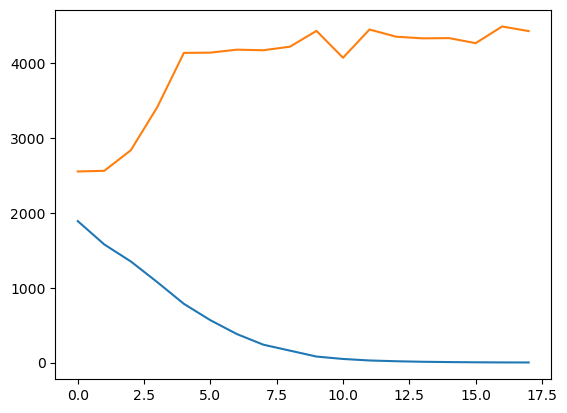

In [71]:
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

In [72]:
dtr = DecisionTreeRegressor(random_state=21,max_depth=2)
modeller(dtr)

(1891.73, 2555.54)

In [73]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=21,max_depth=2)
modeller(rfr)

(1722.79, 2220.47)

# Final Pred

In [74]:
tsd['Loan_Status']=pred_LS

In [75]:
tsdnew = tsd.drop(labels=["Loan_ID","LoanAmount"],axis=1)

In [76]:
from PM12 import catcon
catcon(X_trd)

(['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area',
  'Loan_Status'],
 ['ApplicantIncome',
  'CoapplicantIncome',
  'Loan_Amount_Term',
  'Credit_History'])

In [77]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x1_trd = pd.DataFrame(mm.fit_transform(X_trd[con]),columns=con)
x2_trd = pd.get_dummies(X_trd[cat])
Xnew_trd = x1_trd.join(x2_trd)

In [78]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(Xnew_trd,Y_trd)

In [79]:
cat = []
con = []
for i in tsdnew.columns:
    if(tsdnew[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x1_trd = pd.DataFrame(mm.fit_transform(tsdnew[con]),columns=con)
x2_trd = pd.get_dummies(tsdnew[cat])
Xnew_tsd = x1_trd.join(x2_trd)

In [80]:
len(Xnew_tsd.columns)

21

In [81]:
len(Xnew_trd.columns)

21

In [82]:
pred_loan_amount=model.predict(Xnew_tsd)

In [83]:
F["Predicted_loan_amount"]=pred_loan_amount

In [84]:
F

,Loan_ID,Loan_Status,Amount,Predicted_loan_amount
0,LP001015,Y,110.0,88.125
1,LP001022,Y,126.0,97.875
2,LP001031,Y,208.0,106.375
3,LP001035,Y,100.0,102.125
4,LP001051,Y,78.0,69.375
...,...,...,...,...
362,LP002971,Y,113.0,104.875
363,LP002975,Y,115.0,87.375
364,LP002980,Y,126.0,90.875
365,LP002986,Y,158.0,103.375


In [85]:
F[(F.Loan_Status=="N")&(F.Amount>F.Predicted_loan_amount)]

,Loan_ID,Loan_Status,Amount,Predicted_loan_amount
7,LP001056,N,147.000000,95.75
13,LP001094,N,166.000000,125.75
35,LP001203,N,176.000000,85.25
55,LP001313,N,130.000000,79.75
58,LP001323,N,176.000000,113.75
63,LP001347,N,108.000000,85.25
66,LP001352,N,135.000000,87.00
67,LP001358,N,130.000000,90.75
69,LP001361,N,188.000000,115.25
80,LP001420,N,163.000000,112.25


In [86]:
len(F[(F.Loan_Status=="N")&(F.Amount>F.Predicted_loan_amount)])

51

In [87]:
len(F[(F.Loan_Status=="N")&(F.Amount<=F.Predicted_loan_amount)])

10

# 3. if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [88]:
tsd

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.842199,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.842199,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural,Y


# preprocessing of test data

we have tp fetch only loan_status =N and loan amount term=<240 (240 means 20 years)

In [89]:
Q = tsd[(tsd.Loan_Status == "N")&(tsd.Loan_Amount_Term<=240)]
Q.index = range(0,Q.shape[0])
Q = Q.drop(labels=["Loan_Status","Loan_ID","Loan_Amount_Term"],axis=1)
cat = []
con = []
for i in Q.columns:
    if(Q[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x1_trd = pd.DataFrame(mm.fit_transform(Q[con]),columns=con)
x2_trd = pd.get_dummies(Q[cat])
Xnew_tsd = x1_trd.join(x2_trd)

# preprocessing of training data

In [90]:
X_trd = trd.drop(labels=["Loan_Status","Loan_ID","Loan_Amount_Term"],axis=1)
Y_trd = trd[["Loan_Amount_Term"]]

In [91]:
from PM12 import catcon
catcon(X_trd)

(['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area'],
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History'])

In [92]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x1_trd = pd.DataFrame(mm.fit_transform(X_trd[con]),columns=con)
x2_trd = pd.get_dummies(X_trd[cat])
Xnew_trd = x1_trd.join(x2_trd)

In [93]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew_trd,Y_trd,test_size=0.2,random_state=21)

# linear regression model

In [94]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
modeller(lm)

(2399.56, 2927.67)

# decision tree

In [95]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,max_depth=2)
modeller(dtr)

(2428.25, 3503.81)

In [96]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,max_depth=3)
modeller(dtr)

(2267.38, 3649.06)

In [97]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,max_depth=4)
modeller(dtr)

(2105.68, 4161.1)

In [98]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,max_depth=5)
modeller(dtr)

(1861.66, 4086.04)

In [99]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,max_depth=8)
modeller(dtr)

(982.72, 4314.68)

# Kneighbors regressor(KNN)

In [100]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
modeller(knr)

(1590.91, 3734.69)

In [101]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=9)
modeller(knr)

(2272.11, 3014.95)

In [102]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=39)
modeller(knr)

(2472.69, 3016.97)

# Adaboost regressor

In [103]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2,random_state=21),n_estimators=6)
modeller(abr)

(2493.65, 3453.5)

In [105]:
len(Xnew_tsd.columns)

14

In [106]:
len(Xnew_trd.columns)

19

we need to match columns present in Xnew_tsd and Xnew_trd.

In [108]:
Xnew_tsd[Xnew_trd.columns]

KeyError: "['Gender_Female', 'Dependents_1', 'Dependents_2', 'Self_Employed_Yes', 'Property_Area_Rural'] not in index"

In [109]:
for i in ['Gender_Female', 'Dependents_1', 'Dependents_2', 'Self_Employed_Yes', 'Property_Area_Rural']:
     Xnew_tsd[i]=0

 we got Kneighbors model is the best model .on the basis of kNN model we make prdictions

In [110]:
knr = KNeighborsRegressor(n_neighbors=3)
model=knr.fit(Xnew_trd,Y_trd)


for i in model.predict(Xnew_tsd):
     print(i[0])
    

360.0
240.0
300.0
340.0
400.0


In [113]:
Y_trd.Loan_Amount_Term.value_counts()

360.0    492
180.0     41
342.0     14
480.0     14
300.0     12
240.0      4
Name: Loan_Amount_Term, dtype: int64